---
<img align="left" width="75" height="95"    src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 
<h1 align="center">Digital Image Processing
<h1 align="center">HomeWork 2</h1>
<h3 align="center">MSDSF21M005 Muhammad Tahir</h3>



### Introduction:
The image we take is a nuclear whole body bone scan, used to detect diseases such as bone infection and tumors. Our objective is to enhance this image by sharpening it and by bringing out more of the skeletal detail.
The libraries we used to achieve our target is OpennCV and Matplotlib. 

In [4]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cv2 as cv

#### (a) Image of whole body bone scan.

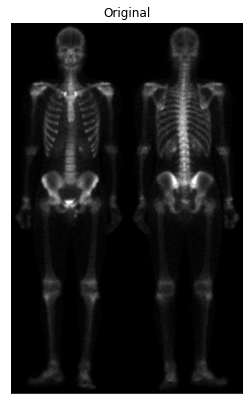

In [5]:
img=io.imread("Image for HW-2.tif")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

#### (b)  Laplacian of (a).
Laplacian of an image take to higlight the regions of high intensity change and highlight gray level discontinuities in an image and try to deemphasize regions with slowly varying gray levels.

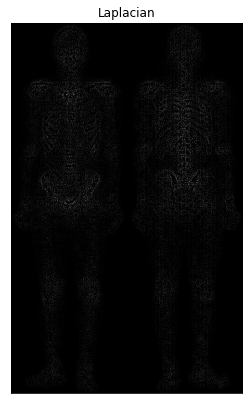

In [6]:
laplacian = cv.Laplacian(img,ddepth=-1)
d=cv.convertScaleAbs(laplacian)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,2,1),plt.imshow(d,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

#### (c) Sharpened image obtained by adding (a) and (b)
Image sharpening is an effect applied to digital images to give them a sharper appearance. Sharpening enhances the definition of edges in an image. Image is sharpen when laplacian add to the original image. 

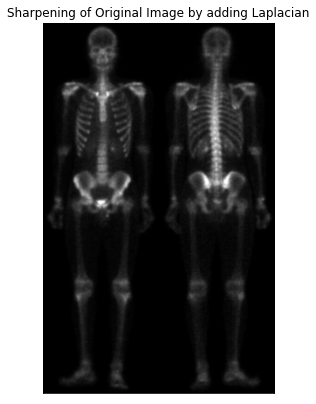

In [10]:
additionofimg = cv.add(img, d, dtype=cv.CV_64F)
s=cv.convertScaleAbs(additionofimg)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,2,1),plt.imshow(s,cmap = 'gray')
plt.title('Sharpening of Original Image by adding Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

#### (d) Sobel gradient of (a).
The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical.I define img as the source image, and x and y are two images which at each point contain the horizontal and vertical derivative approximations respectively.

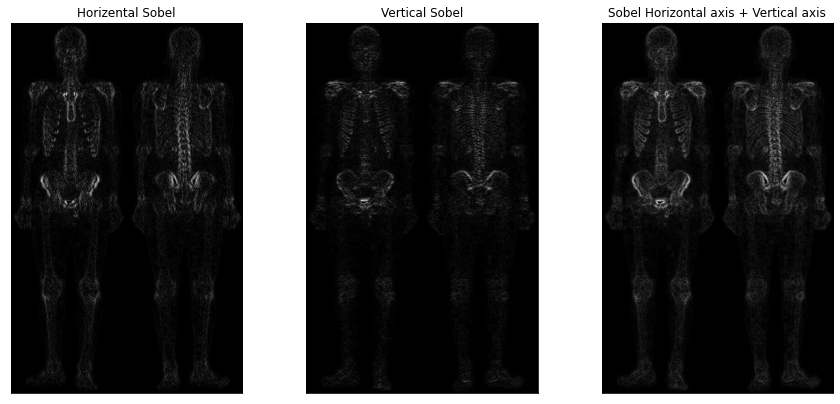

In [12]:
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=1)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=1)
x= cv.convertScaleAbs(sobelx)
y= cv.convertScaleAbs(sobely)
sobelxy = cv.add(x, y)
xy= cv.convertScaleAbs(sobelxy)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,3,1),plt.imshow(x,cmap = 'gray')
plt.title('Horizental Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(y,cmap = 'gray')
plt.title('Vertical Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelxy,cmap = 'gray')
plt.title('Sobel Horizontal axis + Vertical axis'), plt.xticks([]), plt.yticks([])

plt.show()

#### (e) Sobel image smoothed with a 5X5 averaging filter
Smoothing is used to reduce noise within an image or to produce a less pixelated image by using 5x5 image.

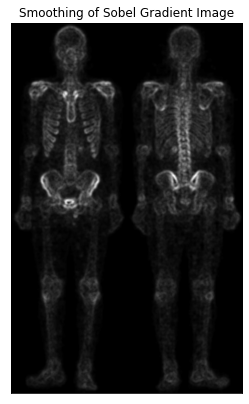

In [13]:
Smothingimg=cv.blur(xy,(5,5));
s_img= cv.convertScaleAbs(Smothingimg)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,2,1),plt.imshow(s_img,cmap = 'gray')
plt.title('Smoothing of Sobel Gradient Image'), plt.xticks([]), plt.yticks([])
plt.show()


#### (f) Mask image formed by the subtraction of (c) and (e)
Claculate mask by subtracting smooth image from the sharp image.

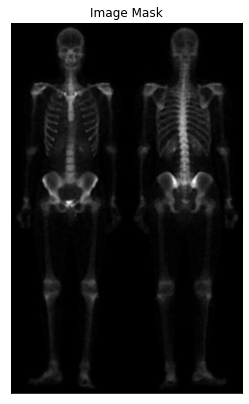

In [14]:
imagemask=cv.subtract(s,s_img,dtype=cv.CV_64F)
img_mask= cv.convertScaleAbs(imagemask)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,2,1),plt.imshow(img_mask,cmap = 'gray')
plt.title('Image Mask'), plt.xticks([]), plt.yticks([])
plt.show()

#### (g) Sharpened image obtained by the sum of (a) and (f).
The mask is add to the original image to sharpening it.

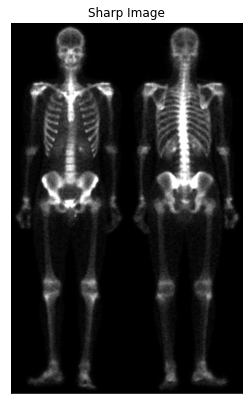

In [15]:
sharpimage1=cv.add(img,img_mask)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,2,1),plt.imshow(sharpimage1,cmap = 'gray')
plt.title('Sharp Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### (h) Final result obtained by applying a power law transformation to (g)
Image is enhance using power law (gama) transformation to increase the dynamic range of the sharpened
image by spreading the intensity level using gamma=0.5.

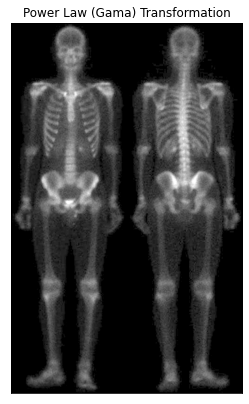

In [16]:
PowerLawTransformation = np.array(255*(img / 255) ** 0.5)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,2,1),plt.imshow(PowerLawTransformation,cmap = 'gray')
plt.title('Power Law (Gama) Transformation'), plt.xticks([]), plt.yticks([])
plt.show()

#### Comparison of image (a) (g) and (h)

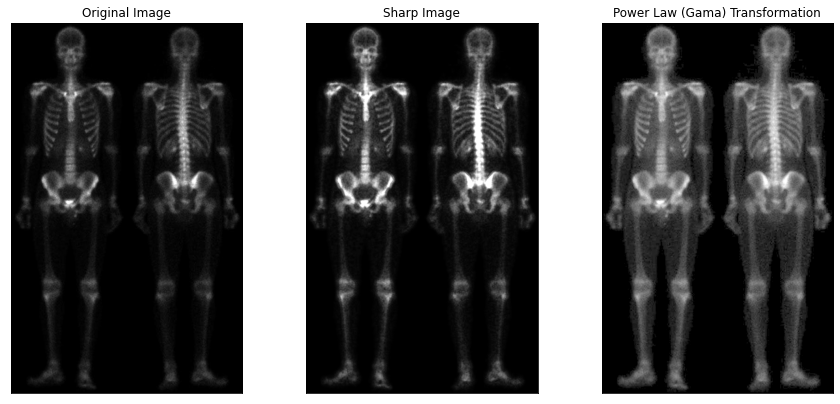

In [285]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(sharpimage1,cmap = 'gray')
plt.title('Sharp Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(PowerLawTransformation,cmap = 'gray')
plt.title('Power Law (Gama) Transformation'), plt.xticks([]), plt.yticks([])
plt.show()